# An extensive analysis of Trump's and Obama's Presidential Speeches
by Mario Damiano Russo (https://github.com/RussoMarioDamiano)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Obtaining-the-Data" data-toc-modified-id="Obtaining-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtaining the Data</a></span><ul class="toc-item"><li><span><a href="#Obama's-Speeches" data-toc-modified-id="Obama's-Speeches-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Obama's Speeches</a></span></li><li><span><a href="#Trump's-Speeches" data-toc-modified-id="Trump's-Speeches-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Trump's Speeches</a></span></li></ul></li><li><span><a href="#Data-and-Preprocessing" data-toc-modified-id="Data-and-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Brief-Data-adjustments-for-our-analysis" data-toc-modified-id="Brief-Data-adjustments-for-our-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Brief Data adjustments for our analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Start-From-Here-if-you-want-to-import-the-preprocessed-dataset." data-toc-modified-id="Start-From-Here-if-you-want-to-import-the-preprocessed-dataset.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Start From Here if you want to import the preprocessed dataset.</a></span></li></ul></li><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summary statistics</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#TFIDF-analysis-of-important-terms" data-toc-modified-id="TFIDF-analysis-of-important-terms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>TFIDF analysis of important terms</a></span><ul class="toc-item"><li><span><a href="#Trump" data-toc-modified-id="Trump-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Trump</a></span></li><li><span><a href="#Obama" data-toc-modified-id="Obama-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Obama</a></span></li><li><span><a href="#Aggregate-heatmap" data-toc-modified-id="Aggregate-heatmap-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Aggregate heatmap</a></span></li></ul></li><li><span><a href="#Topic-Modeling-with-LDA" data-toc-modified-id="Topic-Modeling-with-LDA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Topic Modeling with LDA</a></span><ul class="toc-item"><li><span><a href="#Trump" data-toc-modified-id="Trump-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Trump</a></span></li><li><span><a href="#Obama" data-toc-modified-id="Obama-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Obama</a></span></li><li><span><a href="#Aggregated-Analysis" data-toc-modified-id="Aggregated-Analysis-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Aggregated Analysis</a></span></li></ul></li><li><span><a href="#Dense-Document-Embeddings" data-toc-modified-id="Dense-Document-Embeddings-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Dense Document Embeddings</a></span><ul class="toc-item"><li><span><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Doc2Vec</a></span></li><li><span><a href="#TruncatedSVD" data-toc-modified-id="TruncatedSVD-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>TruncatedSVD</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#(BONUS)-Political-Sentence-Generator" data-toc-modified-id="(BONUS)-Political-Sentence-Generator-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>(BONUS) Political Sentence Generator</a></span><ul class="toc-item"><li><span><a href="#Trump" data-toc-modified-id="Trump-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Trump</a></span></li><li><span><a href="#Obama" data-toc-modified-id="Obama-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Obama</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></div>

***NOTE: this notebook provides the option to import the preprocessed dataset (df_preprocessed.csv). Click on 3.2.1 to start from there.***

# Introduction
*Pick a data set, either from the ones we have used in class, or one that you have found yourself (up to 2 bonus points, depending on size and complexity).
Briefly (max. 100 words!) describe the content and type of the data set (book, reviews, Twitter, ...).*




The **Cyclical Theory** (A. Schlesinger) is a model used by historians to explain the fluctuations in politics throughout American history. Indeed, the end of the Obama era and the rise of Trump might represent the border between two such cycles.
Our goal is to analyze this transition: we will scrape all the speeches of Trump and Obama during their respective presidency period. Each observation will be a speech from a president. Moreover, we will have the dates for each one of these speeches.

**Note: for coherence and ease of readability, the plots will be embedded within the other sections, and will not be presented in a separate section.**


# Obtaining the Data
The code below explains how the data was obtained. **Despite not being part of the final project and not being supposed to be ran**, some parts of it are highly relevant as they involve strong use of `RegEx`'s for data cleaning. Data was scraped from two different sources due to lack of availability on a unified source: 
- www.americanrhetoric.com for Obama's speeches, which are provided as PDFs. To extract the text I used the `parser` function from the `tika` library, and leveraged the power of Regular Expressions to clean the text.
- www.factba.se for Trump's speeches.

```python
#Libraries used for the current section:

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import pandas as pd
import time
import os
from tika import parser
import re ```

## Obama's Speeches
**The cells below are meant to be used as a reference for data extraction and cleaning, and are not meant to be ran.**

Obama Presidency (for reference): 20th Jan 2009 - 20th Jan 2017

```python
options = webdriver.ChromeOptions()

download_folder = "/Users/mario/Downloads/PDFs"    

profile = {"plugins.plugins_list": [{"enabled": False,
                                     "name": "Chrome PDF Viewer"}],
           "download.default_directory": download_folder,
           "download.extensions_to_open": ""}

options.add_experimental_option("prefs", profile)

driver = webdriver.Chrome(executable_path = "/Applications/chromedriver", options = options)

# ---------------------------------------------------------------------------------

driver.get("https://www.americanrhetoric.com/barackobamaspeeches.htm")

# ---------------------------------------------------------------------------------

last_height = driver.execute_script("return document.body.scrollHeight")
pause = 0.5
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(pause)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height == new_height

# ---------------------------------------------------------------------------------

content = driver.page_source
soup = BeautifulSoup(content, "lxml")

rows = soup.find_all("tr")

# ---------------------------------------------------------------------------------

slicing_index_lower = 0
slicing_index_upper = 0
for i in range(len(rows)):
    if rows[i].find_all("td", width = "148") != [] and rows[i].find_all("td", width = "148")[0].get_text().strip() == "20 Jan 2009":
        slicing_index_lower = i
    elif rows[i].find_all("td", width = "148") != [] and rows[i].find_all("td", width = "148")[0].get_text().strip() == "20 Jan 2017":
        slicing_index_upper = i
        break

# ---------------------------------------------------------------------------------

rows = rows[slicing_index_lower:slicing_index_upper + 1]

# ---------------------------------------------------------------------------------

links = []
for row in rows:
    i_href = 0
    find_a = row.find_all("a")
    for i in range(len(find_a)):
        if find_a[i].get_text().strip() == "PDF":
                links.append("https://www.americanrhetoric.com/" + str(find_a[i]).split("\"")[1])

# ---------------------------------------------------------------------------------

for link in links:
    driver.get(link)

# ---------------------------------------------------------------------------------

time.sleep(20) #ensure all files are downloaded.
speeches = os.listdir("/Users/mario/Downloads/PDFs")
speeches_dirs = ["/Users/mario/Downloads/PDFs/{}".format(speech) for speech in speeches]

# ---------------------------------------------------------------------------------

speeches = []
dates = []

for speech_dir in speeches_dirs:
    
    if speech_dir == '/Users/mario/Downloads/PDFs/.DS_Store':
        continue
    
    s = parser.from_file(speech_dir)["content"]
    
    pattern = re.compile("\n+")
    s = re.sub(pattern, "", s)

    pattern = re.compile("\s+")
    s = re.sub(pattern, " ", s)

    pattern = re.compile("\sPage\s[0-9][0-9]*\s")
    s = re.sub(pattern, " ", s)

    s = s.replace(" AAmmeerriiccaannRRhheettoorriicc..ccoomm AmericanRhetoric.com", "")
    s = s.replace("AAmmeerriiccaannRRhheettoorriicc..ccoomm", "")
    s = s.replace("AmericanRhetoric.com", "")
    s = s.replace("AMERICANRHETORIC.COM", "")
    s = s.replace("’", "'")
    
    # Remove header and create a headerless version. We preserve s to extract the date below. 
    # There is a reason for this apparently weird order.
    pattern = re.compile(".+directly\sfrom\saudio\s(and\sedited\sfor\scontinuity\s)?")
    d = re.sub(pattern, "", s)
    
    pattern = re.compile("[Pp]roperty\sof\s\sCopyright\s©20[0-9][0-9].\sAll\srights\sreserved.\s?")
    d = re.sub(pattern, "", d)
    
    pattern = re.compile(".+- Barack Obama -.+[Dd]elivered\s[0-9]?[0-9]\s.?.?.?.?.?.?.?.?.?\s?(20[0-9][0-9])?")
    d = re.sub(pattern, "", d)
    
    if "obama:" in d.lower(): #we want ignore documents that contain interview questions, as they are not speeches.
        continue
    
    # we get the date as well.
    pattern = re.compile("ed\s[0-9]*[0-9]\s[A-Z]?[a-z]+,?\s2?0?[0-9]?[0-9]?")
    #note to self: one document has no year for whatever reason. It is 2016.
    date = re.search(pattern, s).group()

    speeches.append(d)
    dates.append(date.replace("ed ", ""))

# ---------------------------------------------------------------------------------

df_obama = pd.DataFrame({"speech_text": speeches, "date": dates})

# One document did not have the date in it. I googled the date of the speech manually, which is 2006.
df_obama.date.replace('26 February, ', '26 February, 2016', inplace = True)

# Let's implement datetyme dtype in the date column
df_obama["date"] = pd.to_datetime(df_obama["date"])

# and sort accordingly
df_obama.sort_values(by = "date", ascending = False, inplace = True)
df_obama.reset_index(inplace = True, drop = True)

#strip the text to remove trailing and heading whitespaces
df_obama.speech_text = df_obama.speech_text.apply(lambda x: x.strip())

df_obama.head() ```

## Trump's Speeches
**The cells below are meant to be used as a reference for data extraction and cleaning, and are not meant to be ran.**

Trump's Presidency (for reference): 20th Jan 2017 - Today

```python
driver = webdriver.Chrome(executable_path = "/Applications/chromedriver", options = options)
driver.get("https://factba.se/transcripts/speeches")

# ---------------------------------------------------------------------------------

content = driver.page_source
soup = BeautifulSoup(content, "lxml")

# ---------------------------------------------------------------------------------

#This code scrolls down until it reaches the date in which trump got elected, so that it can load all links.
bottom = 0
is_looping = True
pause = 4


while is_looping:
    dates = soup.find_all("li", style = "margin-bottom:120px;")[bottom:]
    for i in range(len(dates)):
        if dates[i].get_text()[2:] == "Feb2017":
            is_looping = False
            print("Done!")
            break
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(pause)
    content = driver.page_source
    soup = BeautifulSoup(content, "lxml")
    bottom = len(dates)

# ---------------------------------------------------------------------------------

# We will scrape all speeches from Jan 20th, 2017 onwards.
content = driver.page_source
soup = BeautifulSoup(content, "lxml")

#timeline headings are the individual cells. we can get the href links from them.
tlh = soup.find_all("div", class_ = "timeline-heading")


links = []
for x in tlh:
    links.append(str(x.find_all("a")[0]).split("\"")[1])

# ---------------------------------------------------------------------------------

# Now we have all the links we need. All we need to do is connect to each one and scrape speeches.
speeches = []
titles = []
pattern1 = re.compile("\[[Aa]pplause.*\]")
pattern2 = re.compile("\s+")
pattern3 = re.compile("\s\[[Aa]udience\s[A-Z]?[a-z]+\]\s")

for link in links:
    driver.get(link)

    content = driver.page_source
    soup = BeautifulSoup(content, "lxml")
    
    #Here we get the column that contains all the "Speech Boxes". we index with [0] as it is a unique element.
    resultsblock = soup.find_all("div", id = "resultsblock")[0]
    
    #we then proceed to create a list of all the speechboxes in the column.
    speechboxes = resultsblock.find_all("div", class_ = "media topic-media-row mediahover")
    
    #create a list with the transcript from each speechbox.
    speech = [speechbox.find_all("div", class_ = "transcript-text-block")[0].get_text() #the transcript-text-block class contains the transcripted text.
          for speechbox in speechboxes #we iterate through all the speechboxes for a given speech
          if speechboxes[0].find_all("div", class_ = "speaker-label")[0].get_text()] #we need to ensure that the speaker of a given speechbox is Donald Trump. ignore the rest.
    
    for i in range(len(speech)):
        speech[i] = re.sub(pattern1, " ", speech[i])
        speech[i] = re.sub(pattern2, " ", speech[i])
        speech[i] = re.sub(pattern3, " ", speech[i])
        speech[i] = speech[i].replace("’", "'")
    
    #now append speech text and date to the lists.
    speeches.append(" ".join(speech))
    titles.append(soup.find_all("h1", class_ = "topic-page-header transcript-header")[0].get_text())
    
df_trump = pd.DataFrame({"speech_text": speeches, "title": titles})

# ---------------------------------------------------------------------------------

#There are a couple of entries in the Title column that have been improperly written. Below we correct that.
df_trump.title.replace({'President Trump Gives Remarks to the National Convention of the American Legion': 
                        'President Trump Gives Remarks to the National Convention of the American Legion - August 8, 2017',
                        'Remarks: Donald Trump - Washington DC, January 22, 2017': 
                        'Remarks: Donald Trump, Washington DC - January 22, 2017',
                        'Remarks: Donald Trump - Department of Homeland Security, Janaury 25, 2017': 
                        'Remarks: Donald Trump, Department of Homeland Security - Janaury 25, 2017'}, inplace = True)

# ---------------------------------------------------------------------------------

l = []
for title in df_trump.title.tolist():
    mdy = title.split(" - ")[-1].split(" -- ")[-1].replace(",", "").split(" ")
    # had to add the second split because title slipped the control of my scraper

    l.append(" ".join([mdy[1], mdy[0], mdy[2]]))
    # change date format from M/D/Y to D/M/Y
    
df_trump["date"] = l

# ---------------------------------------------------------------------------------

# had to add the Janaury replace because one date was miswritten.
df_trump.date.replace({"25 Janaury 2017": "25 January 2017"}, inplace = True)

# ---------------------------------------------------------------------------------

# at this point we have little use for the title.
df_trump.drop("title", axis = 1, inplace = True)

# ---------------------------------------------------------------------------------

# Let's implement datetyime dtype in the date column
df_trump["date"] = pd.to_datetime(df_trump["date"])

# and sort accordingly
df_trump.sort_values(by = "date", ascending = False, inplace = True)

# ---------------------------------------------------------------------------------

# drop speeches before the presidential inaugurational speech.
df_trump = df_trump[df_trump.date > pd.to_datetime("2017-01-01")].reset_index(drop = True)

# ---------------------------------------------------------------------------------

#strip the text to remove trailing and heading whitespaces
df_trump.speech_text = df_trump.speech_text.apply(lambda x: x.strip()) ```

```python
df_trump.to_csv("/Users/mario/Desktop/Trump.csv", sep = "\t", index = False)
df_obama.to_csv("/Users/mario/Desktop/Obama.csv", sep = "\t", index = False) ```

# Data and Preprocessing

In [1]:
# Additional libraries that we will use in the current section:

import numpy as np
import pandas as pd
import re
import spacy
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category = FutureWarning)
sns.set()

## Brief Data adjustments for our analysis
Here we will read the CSV files created with the code above and adjust them for our analysis:
- We will transform the "date" columns to a pd.datetime type;
- We will create a "president" column that tells us the name of the speaking President;
- We will merge the two datasets into a single one.

In [2]:
trump = pd.read_csv("Trump.csv", sep = "\t")

# Let's implement datetime dtype in the date column
trump["date"] = pd.to_datetime(trump["date"])

# Let's add a categorical variable with the name of the President.
trump["president"] = "Trump"

trump.head()

,speech_text,date,president
0,"Well, you better love me; I kept this place op...",2019-03-20,Trump
1,"Oh, thank you very much. Thank you very much. ...",2019-03-02,Trump
2,"Thank you very much, El Paso. Thank you very m...",2019-02-11,Trump
3,"Madam Speaker, Mr. Vice President, Members of ...",2019-02-05,Trump
4,That's such a great song. We should just let i...,2019-01-14,Trump


In [3]:
obama = pd.read_csv("Obama.csv", sep = "\t")

# Let's implement datetime dtype in the date column
obama["date"] = pd.to_datetime(obama["date"])

# Let's add a categorical variable with the name of the President.
obama["president"] = "Obama"

obama.head()

,speech_text,date,president
0,"Hey! All right, that's enough. Don't want to e...",2017-01-12,Obama
1,"Well, good afternoon. It turns out these are e...",2017-01-04,Obama
2,"Good afternoon, everybody. I was just told tha...",2016-12-06,Obama
3,"Well, good evening, everybody. On behalf of Mi...",2016-12-04,Obama
4,"Hello, Greece! Yia sas! Kalispera! [Good eveni...",2016-11-16,Obama


In [4]:
df = pd.concat([trump, obama], axis = 0, ignore_index = True)

# Some checks just to make sure that our new df in the combination of the two previous ones:
assert (df[df.president == "Obama"].reset_index(drop = True) == obama).all().all()
assert (df[df.president == "Trump"] == trump).all().all()


# We want to make sure that the apostrophes are written as "'" instead of "’", else we will have troubles with tokenization.
df.speech_text = df.speech_text.apply(lambda x: x.replace("’", "'"))
# We also want to be sure the trailing and heading whitespaces are removed with the .strip() command.
df.speech_text = df.speech_text.apply(lambda x: x.strip())

df.head()

,speech_text,date,president
0,"Well, you better love me; I kept this place op...",2019-03-20,Trump
1,"Oh, thank you very much. Thank you very much. ...",2019-03-02,Trump
2,"Thank you very much, El Paso. Thank you very m...",2019-02-11,Trump
3,"Madam Speaker, Mr. Vice President, Members of ...",2019-02-05,Trump
4,That's such a great song. We should just let i...,2019-01-14,Trump


## Preprocessing
Our preprocessing will be done in three steps:
1. **Tokenize** the speeches and store the tokens in a new df.tokens column. Tokens are the basic building block for the majority of NLP methods we will use in this notebook;
2. Use the tokens to conduct **Pointwise Mutual Information (PMI) analysis**, and substitute the relevant *collocations* in the text. We want not to lose significance when it comes to collocations such as "United States" or "Second Amendment". Spoiler: data suggests that 39 is the best threshold to use before starting to throw in non-significant word combinations, so we will set 39 as a threshold.
3. **Re-tokenize, lemmatize, and stem**, which are three necessary steps after substituting the compound words obtained from PMI analysis.

In [5]:
nlp = spacy.load("en")

In [6]:
# We define functions for tokenization, lemmatization, and stemming

def tokenization(df):
    # we will replace "'ll" and "'ve" with their full forms, as the reduced forms were significant in TF-IDF and were not considered as stopwords.
    df["tokens"] = [[[token.text.replace("'ll", "will").replace("'ve", "have") for token in sentence] for sentence in nlp(speech).sents] 
         for speech in df.speech_text]


def lemmatization(df):
    # Here I found out that there is oftentimes discordance between what is a PRON for .lemma_ and what is a PRON for .pos_
    # e.g. "ours".lemma_ = "-PRON-"; "ours".pos_ = "ADJ".
    # What I did was therefore to add a further constraint to avoid adding the "-PRON-" lemma to my list of lemmas, and rather get the tokenized lower version of it.
    df["lemmas"] = [[[token.lemma_ if token.lemma_ != "-PRON-" else token.text.lower() 
           for token in sentence if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV", "X"}]
          for sentence in nlp(speech).sents] for speech in df.speech_text]


def stemming(df):
    punctuation = set("""!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~""")
    stemmer = SnowballStemmer("english")
    
    df["stems"] = [[[stemmer.stem(token) for token in tokenized_sentence if token not in punctuation] 
                   for tokenized_sentence in tokenized_speech]
                   for tokenized_speech in df.tokens]

In [7]:
# We start by tokenizing as we need the tokens to do PMI analysis. 
# We will not lemmatize nor stem since doing it now is pointless and we will need to re-do it after PMI anyways.
tokenization(df)

# We will also store the two lists of pre-PMI tokens, as we will need them later on for Summary statistics.
pre_pmi_tokens_trump = [token for speech in df[df.president == "Trump"].tokens for sentence in speech for token in sentence]
pre_pmi_tokens_obama = [token for speech in df[df.president == "Obama"].tokens for sentence in speech for token in sentence]

In [8]:
# --PMI analysis--

# create a set with all the built-in stopwords in nltk
stopwords_ = set(stopwords.words("english"))

# create a list of tokenized sentences from the list of tokens.
documents = [(" ".join(sentence)).replace(" ’", "'").replace(" '", "'") for token_list in df.tokens for sentence in token_list]

# Filter out stopwords and words shorter than 2 characters.
words = [word.lower() for document in documents for word in document.split()
        if len(word) > 2 and word not in stopwords_]


finder = BigramCollocationFinder.from_words(words)

bgm = BigramAssocMeasures()

score = bgm.mi_like


# Let's create the list of all possible Collocations
collocations = {"_".join(bigram): pmi for bigram, pmi in finder.score_ngrams(score)}

# Let's print the collocations we will replace
print([key for key, value in zip(collocations.keys(), collocations.values()) if value >= 39])


# Let's replace the bigrams of interest in our corpus with the newly-obtained Collocations.
l = []
for speech in df.speech_text:
    for key, value in collocations.items():
        if value > 39:
            pattern = re.compile(("\s".join(key.split("_"))), re.IGNORECASE)
            speech = re.sub(pattern, key, speech)
    l.append(speech)

df.speech_text = l

['united_states', 'god_bless', 'health_care', 'men_women', "we're_going", 'supreme_court', 'law_enforcement', 'prime_minister', 'nancy_pelosi', 'you_know', 'fake_news', 'michael_eidenmuller', 'middle_class', 'tax_cuts', 'transcription_michael', 'white_house', 'bin_laden', 'audience_chants', 'middle_east', 'little_bit', '21st_century', 'magic_wand', 'north_korea', 'maxine_waters', 'ronald_reagan']


In [9]:
# And for last, run the three preprocessing functions.

tokenization(df)
lemmatization(df)
stemming(df)

# And export everything
df.to_pickle("df_preprocessed.pkl")

### Start From Here if you want to import the preprocessed dataset.

In [10]:
df = pd.read_pickle("df_preprocessed.pkl")

## Summary statistics
Below we create an informative table with relevant information of our data before and after preprocessing. The table will cover information about the number of tokens (before-and-after preprocessing) and stems, as well as data on the length of sentences, speeches, and vocabularies of the two Presidents.

In [11]:
stats = pd.DataFrame({
              "Trump": 
                        [df[df.president == "Trump"].shape[0],
                        np.mean([len([token for token in sentence]) for speech in df[df.president == "Trump"].tokens for sentence in speech], dtype = np.int64),
                        np.mean([len([token for sentence in speech for token in sentence]) for speech in df[df.president == "Trump"].tokens], dtype = np.int64),
                        len(pre_pmi_tokens_trump),
                        len(set(pd.Series(pre_pmi_tokens_trump).apply(lambda x: x.lower()).tolist())),
                        len([token.lower() for speech in df[df.president == "Trump"].tokens for sentence in speech for token in sentence]),
                        len(set(pd.Series([token for speech in df[df.president == "Trump"].tokens for sentence in speech for token in sentence]).apply(lambda x: x.lower()).tolist())),
                        len(set(pd.Series([stem for speech in df[df.president == "Trump"].stems for sentence in speech for stem in sentence]).apply(lambda x: x.lower()).tolist()))],
              "Obama": 
                        [df[df.president == "Obama"].shape[0],
                        np.mean([len([token for token in sentence]) for speech in df[df.president == "Obama"].tokens for sentence in speech], dtype = np.int64),
                        np.mean([len([token for sentence in speech for token in sentence]) for speech in df[df.president == "Obama"].tokens], dtype = np.int64),
                        len(pre_pmi_tokens_obama),
                        len(set(pd.Series(pre_pmi_tokens_obama).apply(lambda x: x.lower()).tolist())),
                        len([token for speech in df[df.president == "Obama"].tokens for sentence in speech for token in sentence]),
                        len(set(pd.Series([token for speech in df[df.president == "Obama"].tokens for sentence in speech for token in sentence]).apply(lambda x: x.lower()).tolist())),
                        len(set(pd.Series([stem for speech in df[df.president == "Obama"].stems for sentence in speech for stem in sentence]).apply(lambda x: x.lower()).tolist()))],
              "Aggregated": 
                        [df.shape[0], 
                        np.mean([len([token for token in sentence]) for speech in df.tokens for sentence in speech], dtype = np.int64),
                        np.mean([len([token for sentence in speech for token in sentence]) for speech in df.tokens], dtype = np.int64),
                        len(pre_pmi_tokens_trump + pre_pmi_tokens_obama),
                        len(set(pd.Series(pre_pmi_tokens_trump + pre_pmi_tokens_obama).apply(lambda x: x.lower()).tolist())),
                        len([token for speech in df.tokens for sentence in speech for token in sentence]),
                        len(set(pd.Series([token for speech in df.tokens for sentence in speech for token in sentence]).apply(lambda x: x.lower()).tolist())),
                        len(set(pd.Series([stem for speech in df.stems for sentence in speech for stem in sentence]).apply(lambda x: x.lower()).tolist()))]},
    
             index = ["Number of Documents", "Average Sentence Length (words)", "Average speech Length (words)",
                      "Number of pre-PMI Tokens", "Number of pre-PMI Types (lower)", "Number of post-PMI Tokens",
                      "Number of post-PMI Types (lower)", "Number of unique Stems (no punct)"])

stats

,Trump,Obama,Aggregated
Number of Documents,205,278,483
Average Sentence Length (words),12,20,15
Average speech Length (words),4620,3118,3756
Number of pre-PMI Tokens,955956,870666,1826622
Number of pre-PMI Types (lower),13176,19013,22846
Number of post-PMI Tokens,947220,866973,1814193
Number of post-PMI Types (lower),13199,19036,22872
Number of unique Stems (no punct),8667,11976,14563


**Notes**: From the table above, we can observe that:
- Trump speaks a lot more compared to obama in its speeches.
- Trump's sentences are shorter than Obama's.
- Trump's vocabulary is narrower compared to Obama's, based on the number of unique tokens.

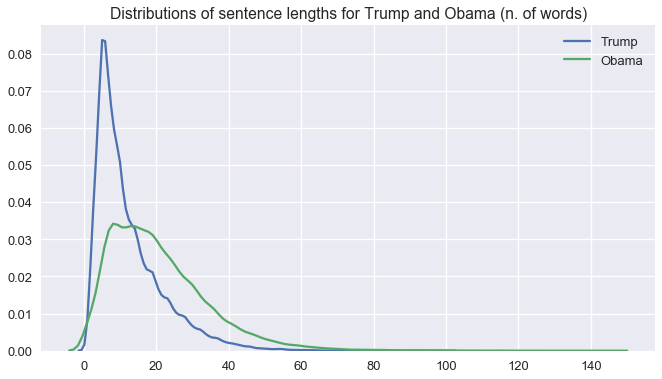

In [12]:
sns.set()
sns.set_context("talk")
fig, axis = plt.subplots(nrows = 1, ncols = 1, figsize = (11, 6))

sns.distplot([len([token for token in sentence]) for speech in df[df.president == "Trump"].tokens for sentence in speech], label = "Trump", hist = False, ax = axis)
sns.distplot([len([token for token in sentence]) for speech in df[df.president == "Obama"].tokens for sentence in speech], label = "Obama", hist = False, ax = axis)
plt.legend()
plt.title("Distributions of sentence lengths for Trump and Obama (n. of words)");

**Note**: Trump's sentence lengths draw a Zipf's distribution, Obama's ones have higher variance and can be very long at times.

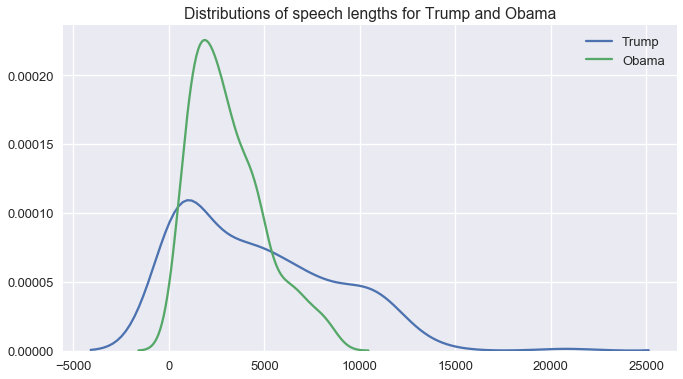

In [13]:
sns.set()
sns.set_context("talk")
fig, axis = plt.subplots(nrows = 1, ncols = 1, figsize = (11, 6))

sns.distplot([len([token for sentence in speech for token in sentence]) for speech in df[df.president == "Trump"].tokens], label = "Trump", hist = False, ax = axis)
sns.distplot([len([token for sentence in speech for token in sentence]) for speech in df[df.president == "Obama"].tokens], label = "Obama", hist = False, ax = axis)
plt.legend()
plt.title("Distributions of speech lengths for Trump and Obama");

**Note**: Trump's speech lengths have higher variance than Obama's. 

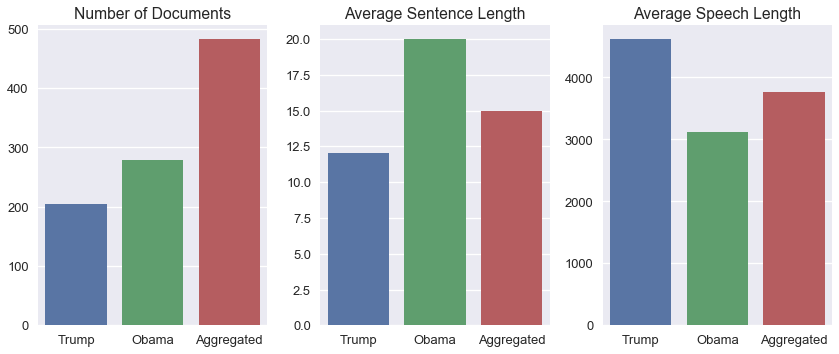

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 5), squeeze = False)
plt.tight_layout()
plt.style.use('seaborn')
sns.set_context("talk")

axes[0][0].set_title("Number of Documents")
sns.barplot(stats.iloc[0, :].index.tolist(), stats.iloc[0, :].values.tolist(), ax = axes[0][0])

axes[0][1].set_title("Average Sentence Length")
sns.barplot(stats.iloc[1, :].index.tolist(), stats.iloc[1, :].values.tolist(), ax = axes[0][1])

axes[0][2].set_title("Average Speech Length")
sns.barplot(stats.iloc[2, :].index.tolist(), stats.iloc[2, :].values.tolist(), ax = axes[0][2]);

# Analysis

The end of the Obama administration and the start of the Trump presidency indeed represented a big turn in the administrative landscape of America. But was this political shift also a rhetorical one? Can Trump be considered a rhetorical disruption compared to the standard portrayed by Obama until 2017?
In our research, we will try to figure this out, studying the relevant differences between the speeches of the two presidents and drawing significant conclusions on the linguistic patterns that appeal to the American people as of today.

## TFIDF analysis of important terms 
For the purpose of our analysis, TF-IDF allows us to determine the potential topics that can characterize Trump's and Obama's speeches.

TF-IDF analysis will be conducted on both tokens and stems to grasp different kinds of information. We expect word-specific meanings to emerge during tokens TF-IDF analysis (for example, "going" will oftentimes have a different meaning from "go"/"gone", as the former is used a lot to express future events). Stem TF-IDF, on the other hand, focuses more on generic word topics.

In [15]:
# Additional libraries that we will use in the current section:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

### Trump

In [16]:
#First thing first, we need to flatten our list.
documents = [" ".join(sentence) for token_list in df[df.president == "Trump"].tokens for sentence in token_list]
documents[:5]

['Well , you better love me ; I kept this place open , that I can tell you .',
 'They said , " We \'re closing it . "',
 'And I said , " No , we \'re not . "',
 "And now you 're doing record business .",
 'The job you do is incredible .']

In [17]:
tfidf_vectorizer = TfidfVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                                   stop_words = "english", sublinear_tf = True)

X_tfidf = tfidf_vectorizer.fit_transform(documents)


count_vectorizer = CountVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                             stop_words = "english")

X_count = count_vectorizer.fit_transform(documents)


word_counts = X_count.toarray()

word_tfidf = X_tfidf.toarray()
word_tfidf[word_tfidf < 0.2] = 0

trump_tfidf = pd.DataFrame(data = {"word": count_vectorizer.get_feature_names(),
                         "tf": word_counts.sum(axis = 0),
                         "idf": tfidf_vectorizer.idf_,
                         "tfidf": word_tfidf.sum(axis = 0)})


trump_tfidf.sort_values(["tfidf", "tf", "idf"], ascending = False, inplace = True)
trump_tfidf.reset_index(drop = True, inplace = True)

trump_tfidf[:20]

,word,tf,idf,tfidf
0,thank,2476,4.451397,1931.793927
1,great,4283,3.970192,1686.142375
2,people,4750,3.856106,1641.315134
3,going,4035,4.030210,1595.118380
4,right,2698,4.370052,1427.093368
5,said,3143,4.238475,1385.345852
6,want,3395,4.189892,1366.317342
7,you_know,2728,4.351550,1345.497255
8,like,2716,4.382322,1188.017030
9,did,2136,4.623764,1083.838111


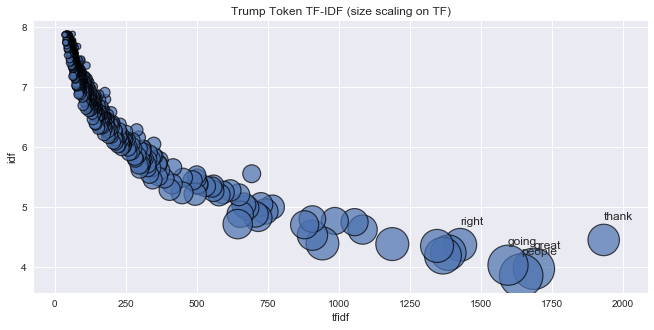

In [18]:
sns.set_context("talk")
sns.set()

fig, ax = plt.subplots(figsize = (11, 5))

ax.set_xbound(2200)

ax.scatter(trump_tfidf.tfidf, trump_tfidf.idf, s = trump_tfidf.tf * 0.4, 
            cmap = "Blues", alpha = 0.7, edgecolors = "black", linewidths = 1.2)

ax.set_title("Trump Token TF-IDF (size scaling on TF)")
ax.set_ylabel("idf")
ax.set_xlabel("tfidf");

for index, text in enumerate(trump_tfidf.word[:5].tolist()):
    ax.annotate(text, (trump_tfidf.tfidf.tolist()[index], trump_tfidf.idf.tolist()[index]), 
                (trump_tfidf.tfidf.tolist()[index] + 0, trump_tfidf.idf.tolist()[index] + 0.34))

Below we will conduct TFIDF stem analysis.

In [19]:
#First thing first, we need to flatten our list.
documents = [" ".join(sentence) for stem_list in df[df.president == "Trump"].stems for sentence in stem_list]
documents[:5]

['well you better love me i kept this place open that i can tell you',
 'they said we re close it',
 'and i said no we re not',
 'and now you re do record busi',
 'the job you do is incred']

In [20]:
tfidf_vectorizer = TfidfVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                                   stop_words = "english", sublinear_tf = True)

X_tfidf = tfidf_vectorizer.fit_transform(documents)


count_vectorizer = CountVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                             stop_words = "english")

X_count = count_vectorizer.fit_transform(documents)


stem_counts = X_count.toarray()

stem_tfidf = X_tfidf.toarray()
stem_tfidf[stem_tfidf < 0.2] = 0

trump_stem_tfidf = pd.DataFrame(data = {"word": count_vectorizer.get_feature_names(),
                         "tf": stem_counts.sum(axis = 0),
                         "idf": tfidf_vectorizer.idf_,
                         "tfidf": stem_tfidf.sum(axis = 0)})


trump_stem_tfidf.sort_values(["tfidf", "tf", "idf"], ascending = False, inplace = True)
trump_stem_tfidf.reset_index(drop = True, inplace = True)

trump_stem_tfidf[:20]

,word,tf,idf,tfidf
0,thank,2646,4.385026,1908.099626
1,great,4347,3.954978,1690.453093
2,peopl,4759,3.854284,1543.963627
3,want,3857,4.062746,1422.876206
4,right,2786,4.341500,1411.143924
5,said,3143,4.238475,1327.460364
6,you_know,2728,4.351550,1283.644377
7,veri,3338,4.266255,1279.246217
8,like,2833,4.342241,1134.455745
9,think,1943,4.699234,1073.511681


### Obama

In [21]:
#First thing first, we need to flatten our list.
documents = [" ".join(sentence) for token_list in df[df.president == "Obama"].tokens for sentence in token_list]
documents[:5]

['Hey !',
 "All right , that 's enough .",
 "Do n't want to embarrass the guy .",
 'Welcome to the white_house , everybody .',
 'As I have already delivered my farewell address , I will try to be relatively brief .']

In [22]:
tfidf_vectorizer = TfidfVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                                   stop_words = "english", sublinear_tf = True)

X_tfidf = tfidf_vectorizer.fit_transform(documents)


count_vectorizer = CountVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                             stop_words = "english")

X_count = count_vectorizer.fit_transform(documents)


word_counts = X_count.toarray()

word_tfidf = X_tfidf.toarray()
word_tfidf[word_tfidf < 0.2] = 0

obama_tfidf = pd.DataFrame(data = {"word": count_vectorizer.get_feature_names(),
                         "tf": word_counts.sum(axis = 0),
                         "idf": tfidf_vectorizer.idf_,
                         "tfidf": word_tfidf.sum(axis = 0)})


obama_tfidf.sort_values(["tfidf", "tf", "idf"], ascending = False, inplace = True)
obama_tfidf.reset_index(drop = True, inplace = True)

obama_tfidf[:20]

,word,tf,idf,tfidf
0,people,3487,3.557940,559.057393
1,thank,838,4.932040,543.509046
2,america,2117,4.024759,538.463814
3,know,1392,4.437343,486.984286
4,just,2005,4.094661,481.032712
5,world,2062,4.061127,435.207914
6,today,1481,4.358495,420.718528
7,time,1438,4.436604,404.097549
8,want,1288,4.530217,397.090195
9,work,1420,4.424857,377.583130


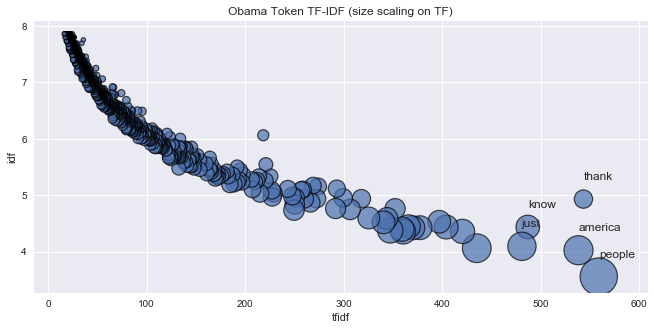

In [23]:
sns.set_context("talk")
sns.set()

fig, ax = plt.subplots(figsize = (11, 5))

ax.set_xbound(700)

ax.scatter(obama_tfidf.tfidf, obama_tfidf.idf, s = obama_tfidf.tf * 0.4, 
            cmap = "Blues", alpha = 0.7, edgecolors = "black", linewidths = 1.2)

ax.set_title("Obama Token TF-IDF (size scaling on TF)")
ax.set_ylabel("idf")
ax.set_xlabel("tfidf");

for index, text in enumerate(obama_tfidf.word[:5].tolist()):
    ax.annotate(text, (obama_tfidf.tfidf.tolist()[index], obama_tfidf.idf.tolist()[index]), 
                (obama_tfidf.tfidf.tolist()[index] + 0, obama_tfidf.idf.tolist()[index] + 0.34))

Below we will conduct TFIDF stem analysis.

In [24]:
#First thing first, we need to flatten our list.
documents = [" ".join(sentence) for stem_list in df[df.president == "Obama"].stems for sentence in stem_list]
documents[:5]

['hey',
 "all right that 's enough",
 "do n't want to embarrass the guy",
 'welcom to the white_hous everybodi',
 'as i have alreadi deliv my farewel address i will tri to be relat brief']

In [25]:
tfidf_vectorizer = TfidfVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                                   stop_words = "english", sublinear_tf = True)

X_tfidf = tfidf_vectorizer.fit_transform(documents)


count_vectorizer = CountVectorizer(analyzer = "word", min_df = 0.001, max_df = 0.75,
                             stop_words = "english")

X_count = count_vectorizer.fit_transform(documents)


stem_counts = X_count.toarray()

stem_tfidf = X_tfidf.toarray()
stem_tfidf[stem_tfidf < 0.2] = 0

obama_stem_tfidf = pd.DataFrame(data = {"word": count_vectorizer.get_feature_names(),
                         "tf": stem_counts.sum(axis = 0),
                         "idf": tfidf_vectorizer.idf_,
                         "tfidf": stem_tfidf.sum(axis = 0)})


obama_stem_tfidf.sort_values(["tfidf", "tf", "idf"], ascending = False, inplace = True)
obama_stem_tfidf.reset_index(drop = True, inplace = True)

obama_stem_tfidf[:20]

,word,tf,idf,tfidf
0,thank,1030,4.728728,550.930339
1,america,2188,3.991559,518.055785
2,peopl,3568,3.534595,509.422661
3,american,2632,3.827385,479.962302
4,know,1539,4.335537,476.957892
5,work,2292,3.961261,466.765044
6,just,2006,4.094136,449.743554
7,time,1784,4.223854,443.714175
8,make,2201,4.011153,436.013754
9,right,1621,4.324912,424.936254


**Notes**: Numbers at hand, there are some relevant observations that pop up.

- The word "world" is a hot topic for Obama, whereas it is quite low on the list for Trump. This could either imply that the word appears in a less concentrated, more spread-out way in Trump speeches or that Obama's speeches are more oriented towards a globalized view of politics. But by accounting for the total document frequencies second option is clearly the true one.
- Words concerning the U.S. (America, american, united_states) are extremely popular in Obama's speeches, whereas they are lower on the list for Trump.
- Trump loves to say "you know" during his speeches, probably in a will to make them more informal.
- Positive topics (good, love) are a bit more prevalent in Trump's speeches.
- It is interesting to note the word "Work" in Obama's TF-IDF table and the word "Job" in Trump's, with no table containing the two of them. Maybe a psychologist might be able to give it a relevant interpretation.


### Aggregate heatmap

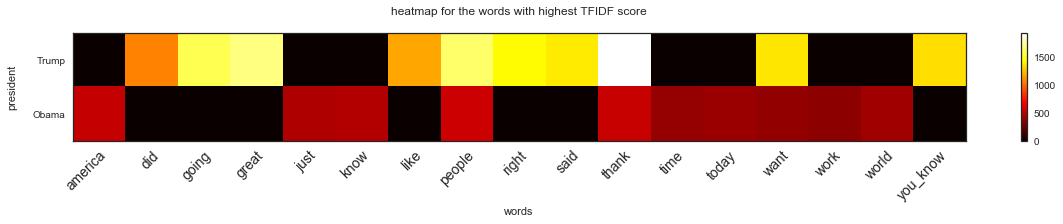

In [26]:
tfidf_df = [trump_tfidf, obama_tfidf]

sns.set_style("white")
l_tup = []
for i in range(2):
    l = []
    for j in range(10):
        l.append((tfidf_df[i].word.iloc[j], tfidf_df[i].tfidf.iloc[j]))
    l_tup.append(l)



data_heat = {i: OrderedDict(l_tup[i]) for i in range(2)}


df_heat = pd.DataFrame(data_heat)
df_heat = df_heat.fillna(0).T

fig, ax = plt.subplots(figsize=(20,2))


plt.imshow(df_heat, cmap='hot', interpolation='none', aspect="auto")
li = list(df_heat.columns)

ax.set_xticks(np.arange(0, len(df_heat.columns)))
ax.set_yticks(np.arange(0, len(df.president.unique())))
plt.ylabel("president\n")
plt.xlabel("words")
ax.set_xticklabels(li)
ax.set_yticklabels(["Trump", "Obama"])
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor", fontsize = 14)

ax.set_title("heatmap for the words with highest TFIDF score\n")
plt.colorbar()
plt.show()

## Topic Modeling with LDA

In [27]:
# Additional libraries that we will use in the current section:

from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing

### Trump

In [28]:
trump_instances = [[lemma for lemmatized_sentence in lemmatized_speech for lemma in lemmatized_sentence] 
                    for lemmatized_speech in df[df.president == "Trump"].lemmas]

trump_dictionary = Dictionary(trump_instances)

#let's remove the 10 most frequent words.
trump_dictionary.filter_extremes(no_below = 5, no_above = 0.4)
print(trump_dictionary)

Dictionary(2665 unique tokens: ['8th', 'abuse', 'accomplish', 'accountability', 'achievement']...)


In [29]:
# create a BoW for each document
trump_ldacorpus = [trump_dictionary.doc2bow(text) for text in trump_instances]

trump_tfidfmodel = TfidfModel(trump_ldacorpus)

trump_model_corpus = trump_tfidfmodel[trump_ldacorpus]


num_topics = 20 # number of topics, we want a lot of them. After all, it's politics!

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(trump_model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
trump_model = LdaMulticore(num_topics = num_topics, # number of topics
                     corpus = trump_model_corpus, #what to train on 
                     id2word = trump_dictionary, # mappinf from IDs to words
                     workers = min(10, multiprocessing.cpu_count()-1), # better to choose all your cores - 1 to allow for multitasking.
                     passes = num_passes, # make this many passes over data
                     chunksize = chunk_size, # update after this many instances
                     alpha = 0.1
                    )
    
print("done in {}".format(time.time()-start), flush=True)
print("")


# transform the data into topic distros
trump_topic_corpus = trump_model[trump_model_corpus]

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                trump_model.print_topics(num_topics = num_topics, num_words = 5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

10.25
fitting model
done in 6.425979137420654

1 "spirit", "dream", "alien", "judge", "faith"
2 "infrastructure", "focus", "wound", "reduction", "image"
3 "alien", "mother", "debate", "ok", "catch"
4 "detain", "enable", "thief", "minor", "hearing"
5 "inaudible", "car", "trader", "hour", "missile"
6 "duty", "enforce", "remove", "responsibility", "nominate"
7 "teacher", "distribution", "relate", "harden", "immediate"
8 "serve", "tonight", "steel", "coal", "peace"
9 "subsidy", "sheet", "vibrant", "siege", "crude"
10 "relief", "coverage", "plummet", "leak", "cry"
11 "equality", "regardless", "deed", "found", "bullet"
12 "obamacare", "ability", "review", "immediate", "farming"
13 "committed", "addiction", "auto", "s", "shine"
14 "penalty", "cop", "fentanyl", "catch", "exceptional"
15 "fellow", "tool", "terrorism", "interest", "process"
16 "impeach", "beat", "liberal", "hater", "anger"
17 "farmer", "farm", "farming", "sand", "ethanol"
18 "regulatory", "firm", "county", "afford", "critical"
1

### Obama

In [30]:
obama_instances = [[lemma for lemmatized_sentence in lemmatized_speech for lemma in lemmatized_sentence] 
                    for lemmatized_speech in df[df.president == "Obama"].lemmas]

obama_dictionary = Dictionary(obama_instances)

#let's remove the 10 most frequent words.
obama_dictionary.filter_extremes(no_below = 5, no_above = 0.4)
print(obama_dictionary)

Dictionary(3913 unique tokens: ['abide', 'accomplishment', 'additional', 'address', 'administration']...)


In [31]:
obama_ldacorpus = [obama_dictionary.doc2bow(text) for text in obama_instances]

obama_tfidfmodel = TfidfModel(obama_ldacorpus)

obama_model_corpus = obama_tfidfmodel[obama_ldacorpus]


num_topics = 20 # number of topics, we want a lot of them. After all, it's politics!

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(obama_model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
obama_model = LdaMulticore(num_topics = num_topics, # number of topics
                     corpus = obama_model_corpus, #what to train on 
                     id2word = obama_dictionary, # mappinf from IDs to words
                     workers = min(10, multiprocessing.cpu_count()-1), # better to choose all your cores - 1 to allow for multitasking.
                     passes = num_passes, # make this many passes over data
                     chunksize = chunk_size, # update after this many instances
                     alpha = 0.1
                    )
    
print("done in {}".format(time.time()-start), flush=True)
print("")

# transform the data into topic distros
obama_topic_corpus = obama_model[obama_model_corpus]

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                obama_model.print_topics(num_topics = num_topics, num_words = 5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

13.9
fitting model
done in 11.339658975601196

1 "police", "officer", "syrian", "squeeze", "killer"
2 "college", "company", "education", "gun", "budget"
3 "insurance", "premium", "preexist", "marketplace", "coverage"
4 "cuban", "gun", "terrorist", "kid", "information"
5 "outbreak", "pray", "roar", "killer", "humanity"
6 "energy", "clean", "dream", "combat", "pray"
7 "lobby", "gun", "hemisphere", "box", "advice"
8 "deal", "nuclear", "sanction", "vote", "iranian"
9 "insurance", "her", "tonight", "terrorist", "international"
10 "immigrant", "catholic", "trade", "nuclear", "refugee"
11 "crisis", "goal", "climate", "memory", "capacity"
12 "insurgent", "grenade", "valor", "medal", "soldier"
13 "cuban", "exile", "distance", "reconciliation", "embargo"
14 "pollution", "taste", "climate", "protestor", "alliance"
15 "cyber", "privacy", "chemical", "weapon", "treaty"
16 "cuban", "terrorist", "gun", "her", "veteran"
17 "provision", "beach", "hang", "uninsured", "repeal"
18 "mountain", "humanitaria

### Aggregated Analysis

In [32]:
instances = [[lemma for lemmatized_sentence in lemmatized_speech for lemma in lemmatized_sentence] 
                    for lemmatized_speech in df.lemmas]

dictionary = Dictionary(instances)

#let's remove the 10 most frequent words.
dictionary.filter_extremes(no_below = 5, no_above = 0.2)
print(dictionary)

Dictionary(4465 unique tokens: ['8th', 'abuse', 'accelerate', 'accomplish', 'accountability']...)


In [56]:
#replace words by their numerical IDs and their frequency
ldacorpus = [dictionary.doc2bow(text) for text in instances]

# learn TFIDF values from corpus
tfidfmodel = TfidfModel(ldacorpus)

# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]


num_topics = 20 # number of topics

# find chunksize to make about 200 updates
num_passes = 100
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics = num_topics, # number of topics
                     corpus = model_corpus, #what to train on 
                     id2word = dictionary, # mappinf from IDs to words
                     workers = min(10, multiprocessing.cpu_count()-1), # better to choose all your cores - 1 to allow for multitasking.
                     passes = num_passes, # make this many passes over data
                     chunksize = chunk_size, # update after this many instances
                     alpha = 0.075
                    )
    
print("done in {}".format(time.time()-start), flush=True)
print("")


# transform the data into topic distros
topic_corpus = model[model_corpus]

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

241.5
fitting model
done in 86.31495404243469

1 "shutdown", "nephew", "evade", "niece", "cruelly"
2 "paperwork", "receipt", "canadian", "unbreakable", "weekend"
3 "healthcare", "insurance", "crazy", "deficit", "premium"
4 "isil", "iraqi", "airstrike", "kurdish", "renegotiation"
5 "inaudible", "runner", "orbit", "trader", "endurance"
6 "undocumented", "deportation", "stagnation", "fat", "raw"
7 "­­", "friendship", "mom", "bin_laden", "muslim"
8 "insurance", "coverage", "uninsured", "disability", "marketplace"
9 "messenger", "supportive", "feeling", "concert", "regulate"
10 "writing", "metal", "aspect", "frame", "dome"
11 "grenade", "naval", "primary", "spotlight", "hearted"
12 "spending", "deficit", "research", "loan", "innovation"
13 "alien", "gun", "hell", "iranian", "coal"
14 "oil", "regime", "fantastic", "civilian", "libyan"
15 "impeccable", "undying", "vacancy", "surpass", "pen"
16 "laughter", "steel", "farmer", "tariff", "congratulation"
17 "confirmation", "legislative", "await",

In [57]:
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(df.shape[0])]

# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the president category of each document (so we can aggregate)
topic_distros['president'] = df.president

topic_distros.head()

,"shutdown, nephew","paperwork, receipt","healthcare, insurance","isil, iraqi","inaudible, runner","undocumented, deportation","­­, friendship","insurance, coverage","messenger, supportive","writing, metal",...,"spending, deficit","alien, gun","oil, regime","impeccable, undying","laughter, steel","confirmation, legislative","influential, writing","internationally, rivalry","overstay, trench",president
0,0.061248,0.039580,0.052276,0.342339,0.255076,0.157046,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
1,0.090991,0.043883,0.051517,0.374671,0.229336,0.133254,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
2,0.095592,0.069048,0.032841,0.388989,0.278263,0.072195,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
3,0.075041,0.090091,0.013826,0.069848,0.410423,0.267808,0.026737,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
4,0.065692,0.022423,0.036006,0.340834,0.240255,0.221169,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump


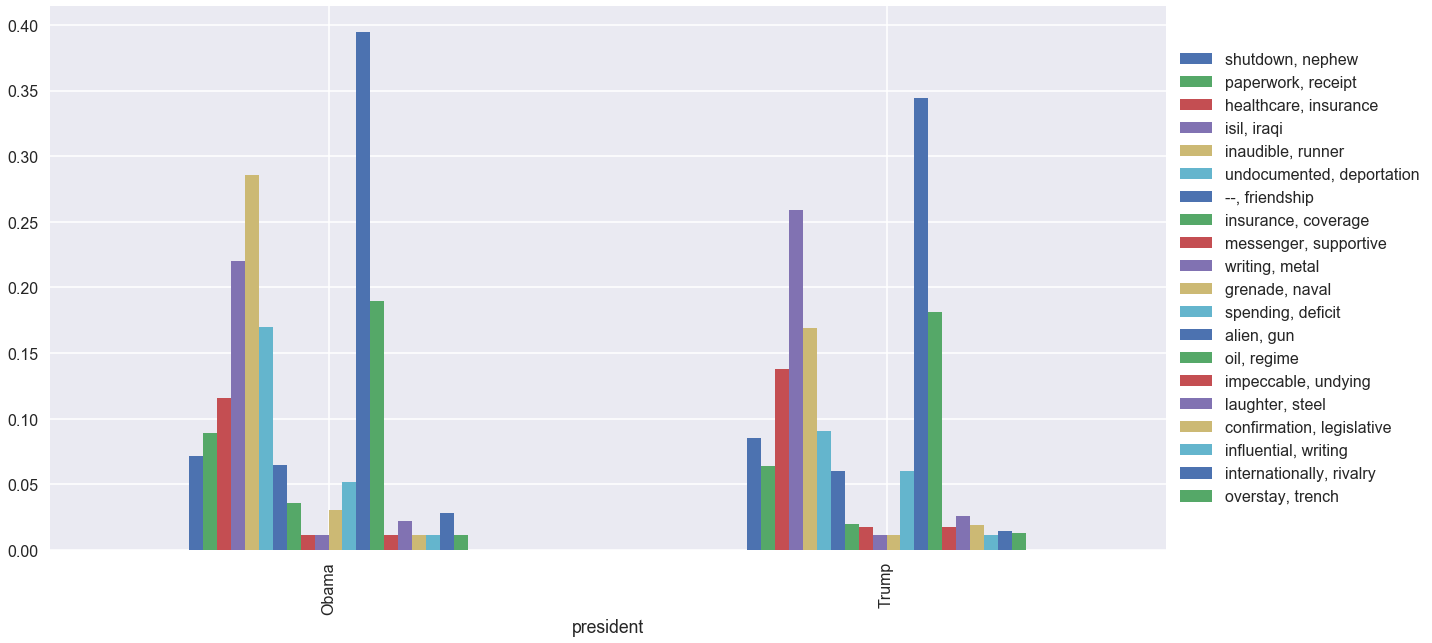

In [58]:
sns.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(20, 10)) # set graph size
# aggregate topics by review categories
aggregate_by_category = topic_distros.groupby(topic_distros.president).mean()
# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

**Notes**: some conclusion on the LDA analysis are (these notes come from a previously-ran LDA Analysis, results may vary since the process is stochastic):
- **2 "bureaucrat", "prime_minister", "canadian", "exciting", "roundtable"** is way more relevant for Obama than Trump, and likely refers to the positive relations with Canada. It would be no surprise, as Trump is famous for his more inward-looking politics.
- **4 "racial", "bias", "tower", "steadfast", "deport"** might refer to issues concerning racial bias and segregation, and are way more relevant in Obama's speeches.
- **8 "naval", "aviation", "battery", "aircraft", "carrier"** is a set of military and bellic terms. Although extremely coherent, it is not very relevant for both.
- **10 "insurance", "deficit", "iranian", "iraqi", "civilian"** might contain two "intruder" words, and seems to be about the Middle East. If so, it should be of no surprise that it is way more prevalent in Obama's speeches, whose presidency strongly dealt with the issue.
- **15 "messenger", "renegotiation", "flight", "endorsement", "withdrawal"** seems to be a topic about "aggressive" political and commercial diplomacy, and is more relevant in Trump's speeches than Obama's.
- **16 "gun", "oil", "conflict", "regime", "information"**: again, another topic most likely on the Middle East. It seems to strongly deal with Intelligence. Again, extremely relevant for Obama and a bit less for Trump.
- **19 "shutdown", "troubled", "rivalry", "internationally", "hate"**: not very relevant on its own, but again it reflects the extreme internationalization of Obama's politics, as it is more relevant for Obama than Trump.
- **20 "kurdish", "airstrike", "insurgency", "hearted", "servicemember"**: topic about the Kurdish rebellions and conflicts. Again, more prevalent for Obama than Trump.


## Dense Document Embeddings

### Doc2Vec

In [36]:
# Additional libraries that we will use in the current section:

from gensim.models import Doc2Vec
from gensim.models.doc2vec import FAST_VERSION
from gensim.models.doc2vec import TaggedDocument
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [37]:
# we will create a new dataframe where each observation is a tokenized speech, to reduce variance.
# NOTE: results do not change even if we use non-tokenized speeches.
tokenized_speeches = [" ".join([" ".join(tokenized_sentence) for tokenized_sentence in tokenized_speech]) for tokenized_speech in df.tokens]
presidents = df.president.tolist()
df_tokenized = pd.DataFrame({"tokenized_speech": tokenized_speeches, "president": presidents})


corpus = []

for row in df_tokenized.iterrows():
    label = row[1].president
    text = row[1].tokenized_speech
    corpus.append(TaggedDocument(text.split(), tags = [str(label)]))


d2v_model = Doc2Vec(vector_size = 100,
                  window = 15,
                  hs = 0,
                  sample = 0.000001,
                  negative = 5,
                  min_count = 100,
                  workers = -1,
                  epochs = 1000,
                  dm = 0,
                  dbow_words = 1)

d2v_model.build_vocab(corpus)

d2v_model.train(corpus, total_examples = d2v_model.corpus_count, epochs = d2v_model.epochs)


d2v_model.docvecs.doctags

{'Trump': Doctag(offset=0, word_count=945830, doc_count=205),
 'Obama': Doctag(offset=1, word_count=866603, doc_count=278)}

In [38]:
target_doc = 'Obama'

similar_docs = d2v_model.docvecs.most_similar(target_doc, topn = 1)
print(similar_docs)

[('Trump', 0.1074085459113121)]


The cosine similarity between the two presidents howers around -0.1. This implies that the two presidents speak of completely unrelated topics, and on the few topics they share they tend to have a diametrically different view.

### TruncatedSVD

In [39]:
#documents must be a list of strings, where each strings represents a lemmatized document
documents = [" ".join(instance) for instance in instances]

assert len(documents) == df.shape[0]

documents[0][:100]

'better love keep place open can tell say be close say be not now be do record business job do be inc'

In [40]:
tfidf_vectorizer =  TfidfVectorizer(ngram_range=(1,2), stop_words='english', analyzer='word', min_df=0.001, max_df=0.5, sublinear_tf=True, use_idf=True)

X = tfidf_vectorizer.fit_transform(documents)

print(X.shape)

(483, 289833)


In [41]:
k = 10

svd = TruncatedSVD(n_components = k)
U = svd.fit_transform(X)
S = svd.singular_values_
V = svd.components_


print(U.shape, S.shape, V.shape)

(483, 10) (10,) (10, 289833)


In [42]:
# Define the 3D plotting function


def show_topics(A, vocabulary, topn = 5):
    """
    find the top N words for each of the latent dimensions (=rows) in a
    """
    topic_words = ([[vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]]
                    for t in A])
    return [', '.join(t) for t in topic_words]



def plot_vectors(vectors, title = 'VIZ', labels = None, dimensions = 3, low_dim = None):
    sns.set_context('poster')
    """
    plot the vectors in 2 or 3 dimensions. If supplied, color them according to the labels
    """
    # set up graph
    fig = plt.figure(figsize = (12, 12))

    # create data frame
    df = pd.DataFrame(data = {'x': vectors[:, 0], 'y': vectors[:, 1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('afmhot') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        sns.set_style("white")
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])
        
        if low_dim != None:
            labels = sorted(show_topics(low_dim_svd.components_, tfidf_vectorizer.get_feature_names()))
            frame1.axes.set_xlabel(labels[0])
            frame1.axes.set_ylabel(labels[1])
            frame1.axes.set_zlabel(labels[2])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c = label_colors[l], cmap = cMap, edgecolor = None, label = label, alpha = 0.3, s = 100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        sns.set()
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c = label_colors[l], cmap = cMap, edgecolor = None, label = label, alpha = 0.3, s = 100)

    else:
        raise NotImplementedError()
    
    plt.legend()
    plt.title(title)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


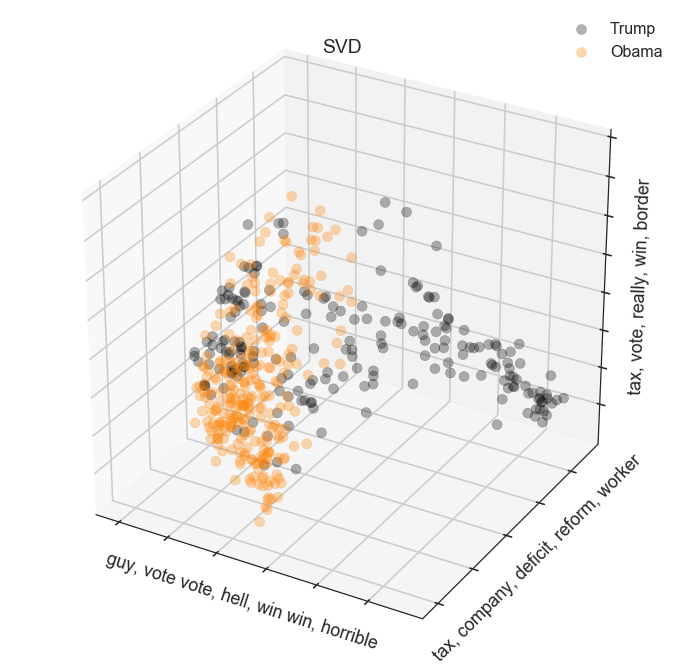

In [43]:
low_dim_svd = TruncatedSVD(n_components = 3)
categories = df.president

low_dim_U = low_dim_svd.fit_transform(X)


plot_vectors(low_dim_U, title = "SVD", labels = categories, dimensions = 3, low_dim = low_dim_svd)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


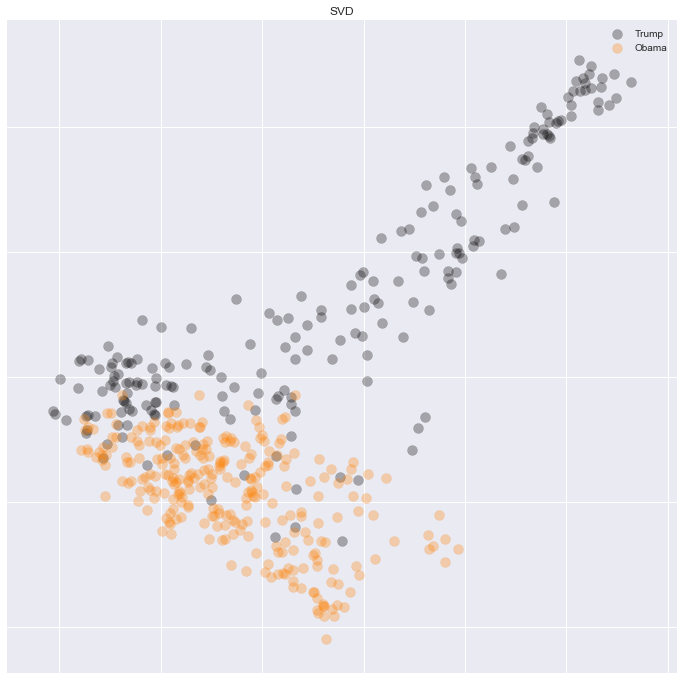

In [44]:
low_dim_svd = TruncatedSVD(n_components = 3)
categories = df.president

low_dim_U = low_dim_svd.fit_transform(X)


plot_vectors(low_dim_U, title = "SVD", labels = categories, dimensions = 2)

We can clearly see that there is a number of Trump's speeches that seem to integrate perfectly with Obama's. One reason could be that they have been written by the same speech ghostwriter. Another reason could be that they tackle similar topics.

## Clustering

In [45]:
# Additional libraries we will use in this section:

from sklearn.cluster import KMeans, AgglomerativeClustering

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


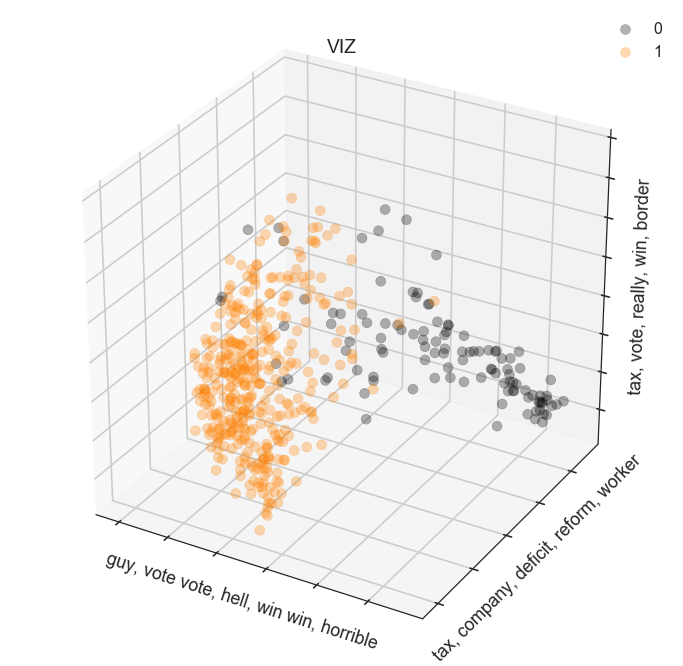

In [46]:
k = 2

low_dim_svd_C = TruncatedSVD(n_components = 300)
X2 = low_dim_svd_C.fit_transform(X)

agg = AgglomerativeClustering(n_clusters = k)

clusters = agg.fit_predict(X2)


agg_prediction = agg.fit_predict(X2)


plot_vectors(X2, labels = agg_prediction, low_dim = low_dim_svd_C)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


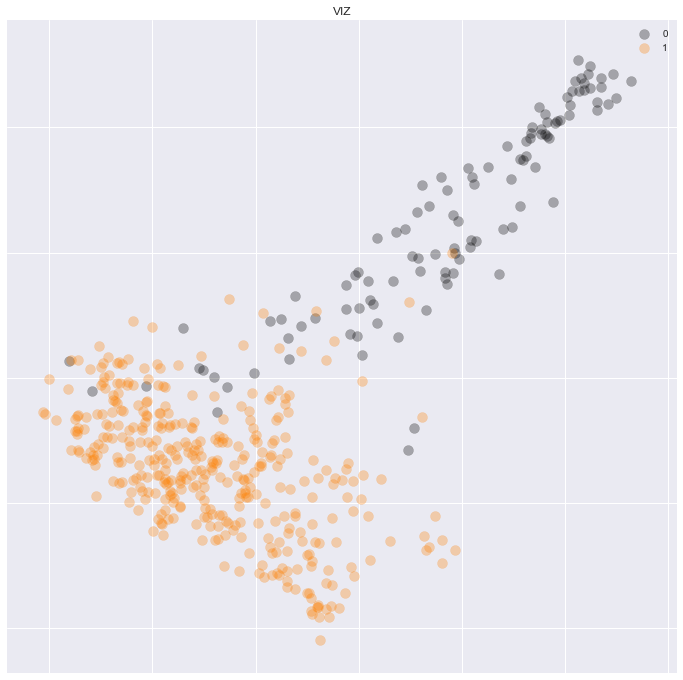

In [47]:
plot_vectors(X2, labels = agg_prediction, dimensions = 2)

## (BONUS) Political Sentence Generator
We can't go through a political speech analysis without making an algorithm that generates random political chit-chats. In the this section, we will create a class for `N-grams Language Models`, with the following functions:
- `.logP(history, w)`: conditional log probability of `w` given `history`;
- `.sentence_logP(S)`: log probability that the sentence `S` belongs to our corpus;
- `.sample_next_word(history)`: sample a new word from a multinomial distribution conditioning on `history`;
- `.generate()`: generates a random sentence based on the conditional log probabilities of our corpus;
- `.finish_sentence(s)`: given an arbitrary sentence, whereas possible, the program will complete it based on the conditional log probabilities of the corpus.


In [48]:
# Additional libraries we will use in the current section:

from collections import defaultdict
import nltk

In [49]:
class n_gram_LM(object):
    def __init__(self, corpus, N, smoothing = 0.001):
        
        self.N = N
        self.smoothing = smoothing
        
        assert type(self.N) == int and self.N != ""
        assert type(smoothing) in [int, float]
        
        self.counts = defaultdict(lambda: defaultdict(lambda: self.smoothing))
        self.corpus = corpus
        
        
    def counts(self):
        return self.counts
    
    
    def fit(self):
        #prevent fitting twice
        assert self.counts == defaultdict(lambda: defaultdict(lambda: self.smoothing))
        
        for sentence in self.corpus:
            #The first thing we need to to is to make each document N-gram compatible by adding START and STOP tokens.
            tokens = (["*"] * (self.N - 1)) + sentence + ["STOP"]
            #Now we can make trigrams out of our lists of tokenized documents.
            for ngram in nltk.ngrams(tokens, self.N):
                self.counts[tuple(ngram)[:-1]][tuple(ngram)[-1]] += 1
    
    #return logP that w appears after history
    def logP(self, history, w):
        assert type(history) in (list, tuple, set)
        assert type(w) == str
        return np.log(self.counts[history][w]) - np.log(sum(self.counts[history].values()))
    
    
    #return logP that a given sentence belongs to the corpus.
    def sentence_logP(self, S):
        tokens = ["*"] * (self.N - 1) + S.split() + ['STOP']
        return sum([self.logP(ngram[:-1], ngram[-1]) for ngram in nltk.ngrams(tokens, self.N)])
    
    
    def sample_next_word(self, history):
        keys = [key for key in self.counts[tuple(history)].keys()]
        values = [value for value in self.counts[tuple(history)].values()]

        # Now create a the probability distribution: divide each number of occurrences of (u, v, w) for each w...
        # ... By the total number of (n-1)grams (u, v)
        values = np.array(values)
        values /= values.sum()
        return keys[np.argmax(np.random.multinomial(1, values))]
    
    
    def generate(self):
        result = ["*"] * (self.N - 1)
        
        next_word = self.sample_next_word(history = result[(-self.N + 1):])
        result.append(next_word)
        
        while next_word != "STOP":
            next_word = self.sample_next_word(history = result[(-self.N + 1):])
            result.append(next_word)
        
        return " ".join(result[self.N-1:-1])
    
    
    def finish_sentence(self, s):
        l = [token.text for sentence in nlp(s).sents for token in sentence]
        result = ["*"] * (self.N - 1 - len(l)) + l
        
        try:
            next_word = self.sample_next_word(history = result[(-self.N + 1):])
            result.append(next_word)

            while next_word != "STOP":
                next_word = self.sample_next_word(history = result[(-self.N + 1):])
                result.append(next_word)
                
            if self.N-1-len(l) > 0:
                return " ".join(result[self.N-1-len(l):-1])
            else:
                return " ".join(result[:-1])
            
        except ValueError:
            print("No sentence completion found :(")

### Trump

In [50]:
corpus_trump = [[token for token in tokenized_sentence] 
          for tokenized_speech in df[df.president == "Trump"].tokens for tokenized_sentence in tokenized_speech]

print(corpus_trump[0])

['Well', ',', 'you', 'better', 'love', 'me', ';', 'I', 'kept', 'this', 'place', 'open', ',', 'that', 'I', 'can', 'tell', 'you', '.']


In [51]:
trump_LM = n_gram_LM(corpus = corpus_trump, N = 4)
trump_LM.fit()

# Trump sentence generator
for iteration in range(5):
    print(trump_LM.generate())
    print("")

Some people said , " Yes , I got it passed .

But we wo n't bring it up .

Since I took over , it 's a new , affordable health_care plans for Georgia , individual markets that only cost about half the price of prescription drugs , Secretary Azar -- coming out of prisons and they 're going to have a right .

Where 's Diane ?

Poland will always prevail .  



In [52]:
# Trump finishes your sentence
trump_LM.finish_sentence("America")

'America first — America first . .'

### Obama

In [53]:
corpus_obama = [[token for token in tokenized_sentence] 
          for tokenized_speech in df[df.president == "Obama"].tokens for tokenized_sentence in tokenized_speech]

print(corpus_obama[0])

['Hey', '!']


In [54]:
obama_LM = n_gram_LM(corpus = corpus_obama, N = 4)
obama_LM.fit()

# Obama sentence generator
for iteration in range(5):
    print(obama_LM.generate())
    print("")

I will be introducing that into the vernacular in Washington .

We must seize this moment .

Now , let me close by addressing some of the solutions are .

Yes , we are summoned to push back on terrorist messages on social media that motivate people to kill .

We know that ushering in a new world awaits -- a world in which threats are more diffuse and missions more complex America can not act alone -- nor do we believe in the inherent dignity of every human being is able to continually affirm its democracy , or Colombia resolve a decades - long war , that strengthens the international order that so many of our faiths .



In [55]:
# Trump finishes your sentence
obama_LM.finish_sentence("America")

'America was actually on track to top $ 1 trillion in spending over the coming decade -- because the freedom and dignity --'

## Conclusions
From our analysis, we can ultimately conclude that Trump indeed represented a rhetorical disruption compared to Obama. The strong prevalence of internal issues and the reduced presence of foreign ones in the speeches of the new president indeed reflects the new path that America is undertaking. 
As of today, americans seems to prefer more transparent and seemingly honest politicians that care about the issues of the nation, instead of the more politically-knowledgeable Presidents that tend to view their country in a global scenario. America elected Trump because it wanted an inward-looking leader capable of tackling structural internal issues.